In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

23.09962520121229 -7.000817092880368
-80.10315660070027 -57.45162777173056
-78.12494626259272 72.5187275239939
8.049732031427027 165.5950704923423
49.33548346141865 72.27999763771186
-68.22860375092598 -81.96518326985672
-21.751877348310913 -133.9637443864763
33.05810804104708 145.94266773273216
-29.419031055754154 -162.90352821396706
42.33623871855039 -77.299832819826
-78.54114792911814 -47.056551131981934
15.434919868331221 19.736683703742187
-46.1429460643369 -89.49995486005267
-13.276918451830994 98.90930490331311
14.604316142503109 58.98126217678376
-39.17763063315328 16.306389566953072
-55.626146391557185 151.28381186134925
-52.784975343497784 -3.472731468056196
-12.937630280670575 -132.9938486850299
-38.89000861955863 -4.6874864949427035
-39.365018193842644 -110.5203338457922
20.264612410756612 46.14492096187914
-4.5725709190137565 46.03875199865212
68.7686789443911 116.28823486654852
48.53902765788973 -81.63464763839806
17.265059394630967 -9.054080865406462
-45.52896895068015 -

In [9]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

594

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [12]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | puerto carreno
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | margate
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | touros
Processing Record 9 of Set 1 | kruisfontein
Processing Record 10 of Set 1 | great yarmouth
Processing Record 11 of Set 1 | camacha
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | torrington
Processing Record 19 of Set 1 | kirakira
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | hirson
Processin

Processing Record 36 of Set 4 | kargasok
Processing Record 37 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 38 of Set 4 | general salgado
Processing Record 39 of Set 4 | illintsi
Processing Record 40 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 41 of Set 4 | den helder
Processing Record 42 of Set 4 | safonovo
Processing Record 43 of Set 4 | isangel
Processing Record 44 of Set 4 | broome
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | gayny
Processing Record 47 of Set 4 | zaoyang
Processing Record 48 of Set 4 | kijang
Processing Record 49 of Set 4 | namatanai
Processing Record 50 of Set 4 | narsaq
Processing Record 1 of Set 5 | ust-kuyga
Processing Record 2 of Set 5 | tiarei
Processing Record 3 of Set 5 | ambon
Processing Record 4 of Set 5 | srandakan
Processing Record 5 of Set 5 | sosua
Processing Record 6 of Set 5 | riberalta
Processing Record 7 of Set 5 | labuhan
Processing Record 8 of Set 5 | paamiut


Processing Record 25 of Set 8 | cap malheureux
Processing Record 26 of Set 8 | oranjemund
Processing Record 27 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 28 of Set 8 | maun
Processing Record 29 of Set 8 | aden
Processing Record 30 of Set 8 | broken hill
Processing Record 31 of Set 8 | tateyama
Processing Record 32 of Set 8 | zawadzkie
Processing Record 33 of Set 8 | vardo
Processing Record 34 of Set 8 | nguiu
City not found. Skipping...
Processing Record 35 of Set 8 | mergui
City not found. Skipping...
Processing Record 36 of Set 8 | coihaique
Processing Record 37 of Set 8 | the pas
Processing Record 38 of Set 8 | iralaya
Processing Record 39 of Set 8 | waipawa
Processing Record 40 of Set 8 | kodinsk
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | monte alegre
Processing Record 43 of Set 8 | jedburgh
Processing Record 44 of Set 8 | nizwa
Processing Record 45 of Set 8 | mount isa
Processing Record 46 of Set 8 | san antonio
Processing Record 47 

Processing Record 12 of Set 12 | bhaderwah
Processing Record 13 of Set 12 | wainwright
Processing Record 14 of Set 12 | ranong
Processing Record 15 of Set 12 | bonga
Processing Record 16 of Set 12 | bathsheba
Processing Record 17 of Set 12 | male
Processing Record 18 of Set 12 | skjervoy
Processing Record 19 of Set 12 | sancti spiritus
Processing Record 20 of Set 12 | itacoatiara
Processing Record 21 of Set 12 | tiznit
Processing Record 22 of Set 12 | mangai
Processing Record 23 of Set 12 | barbar
City not found. Skipping...
Processing Record 24 of Set 12 | yumen
Processing Record 25 of Set 12 | canjulao
Processing Record 26 of Set 12 | evensk
Processing Record 27 of Set 12 | sao cristovao
Processing Record 28 of Set 12 | dubai
Processing Record 29 of Set 12 | ugep
Processing Record 30 of Set 12 | itupiranga
Processing Record 31 of Set 12 | nhulunbuy
Processing Record 32 of Set 12 | severo-kurilsk
Processing Record 33 of Set 12 | teguldet
Processing Record 34 of Set 12 | termiz
Process

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Carreno,6.1890,-67.4859,79.11,77,100,3.00,CO,2022-06-03 21:08:51
1,Vaini,-21.2000,-175.2000,77.54,79,0,5.35,TO,2022-06-03 21:05:07
2,Mataura,-46.1927,168.8643,37.47,95,47,2.86,NZ,2022-06-03 21:08:51
3,Margate,51.3813,1.3862,58.69,85,95,5.99,GB,2022-06-03 21:08:52
4,Puerto Ayora,-0.7393,-90.3518,78.76,92,98,8.01,EC,2022-06-03 21:07:24
5,Touros,-5.1989,-35.4608,78.19,82,100,7.45,BR,2022-06-03 21:08:52
6,Kruisfontein,-34.0033,24.7314,55.51,28,2,6.60,ZA,2022-06-03 21:08:52
7,Great Yarmouth,52.6083,1.7305,56.44,82,15,19.93,GB,2022-06-03 21:08:53
8,Camacha,33.0833,-16.3333,63.82,72,40,11.50,PT,2022-06-03 21:08:53
9,Khatanga,71.9667,102.5000,33.22,90,100,21.27,RU,2022-06-03 21:08:54


In [14]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

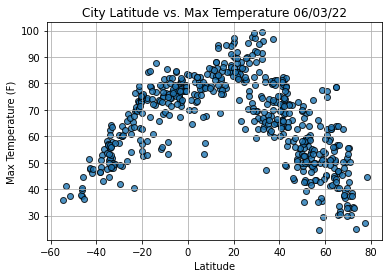

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

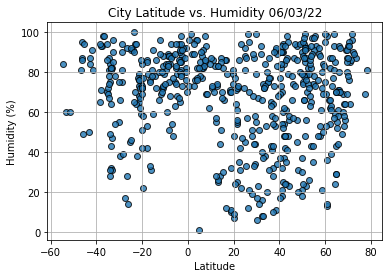

In [18]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

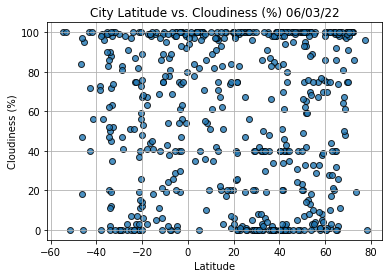

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

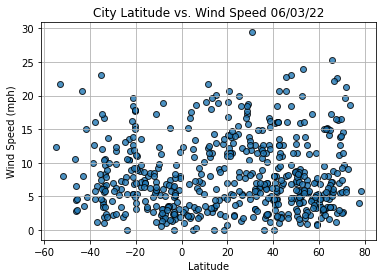

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

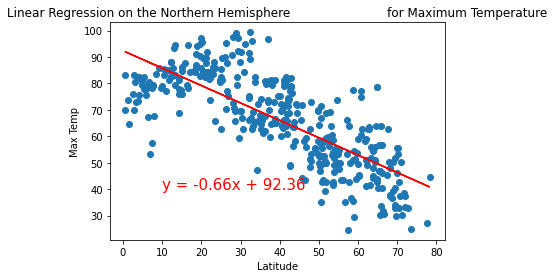

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

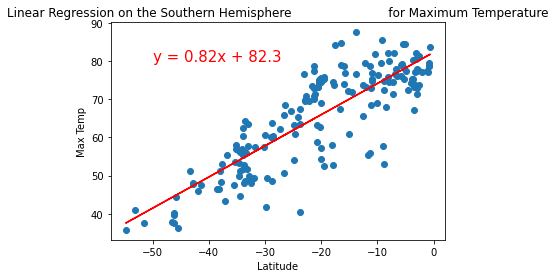

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

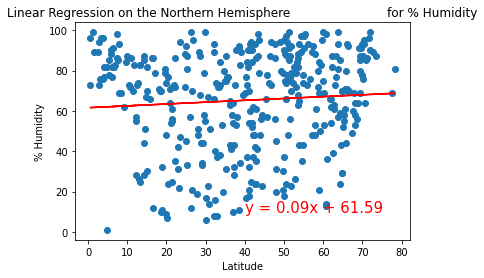

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

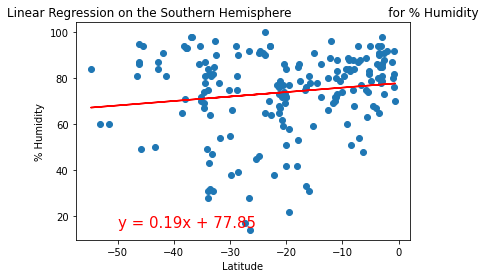

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

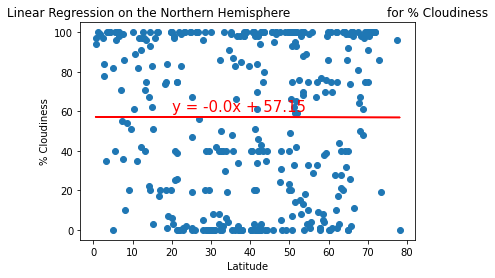

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,60))

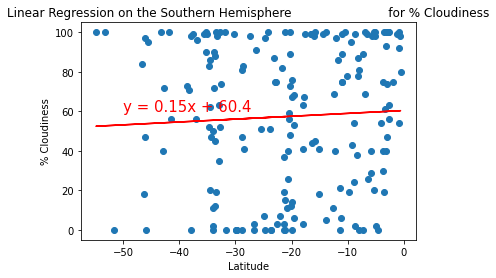

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

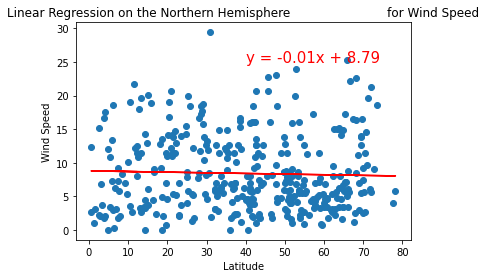

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

In [1]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,15))

NameError: name 'southern_hemi_df' is not defined